In [1]:
import os
os.system("git clone https://github.com/microsoft/unilm.git")

0

In [2]:
import sys
sys.path.append('unilm')
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 'unilm']

In [3]:
sys.path.append('/content/unilm/dit')

In [4]:
os.chdir('unilm/dit')

In [1]:
# !pip install -r requirements.txt

In [2]:
# ! pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html

In [3]:
import cv2

In [4]:
from unilm.dit.object_detection.ditod import add_vit_config
import torch


In [5]:
from detectron2.config import CfgNode as CN
from detectron2.config import get_cfg
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2.data import MetadataCatalog
from detectron2.engine import DefaultPredictor

In [6]:
# Initiating Configuration
cfg = get_cfg()
add_vit_config(cfg)
cfg.merge_from_file('/content/unilm/dit/object_detection/publaynet_configs/cascade/cascade_dit_base.yaml')

In [7]:
cfg.MODEL.WEIGHTS

'https://layoutlm.blob.core.windows.net/dit/dit-pts/dit-base-224-p16-500k-62d53a.pth'

In [8]:
# add model weights url to config
cfg.MODEL.WEIGHTS = "https://layoutlm.blob.core.windows.net/dit/dit-fts/publaynet_dit-b_cascade.pth"

In [9]:
cfg.MODEL.WEIGHTS

'https://layoutlm.blob.core.windows.net/dit/dit-fts/publaynet_dit-b_cascade.pth'

In [10]:
# add device
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [11]:
MetadataCatalog.get(cfg.DATASETS.TEST[0])

Metadata(name='publaynet_val')

In [12]:
# defining the model
predictor = DefaultPredictor(cfg)

publaynet_dit-b_cascade.pth: 564MB [00:59, 9.53MB/s]                           


In [13]:
# a function that takes an image and returns it with the detections drawn on it
def analyze_image(img):
  md = MetadataCatalog.get(cfg.DATASETS.TEST[0])
  if cfg.DATASETS.TEST[0] == 'icdar2019_test':
    md.set(thing_classes = ["table"])
  else:
    md.set(thing_classes = ["text","title","list","table","figure"])
  output = predictor(img)["instances"]
  v = Visualizer(img[:,:, ::-1],
                 md,
                 scale = 1.0,
                 instance_mode=ColorMode.SEGMENTATION)
  result = v.draw_instance_predictions(output.to("cpu"))
  result_image = result.get_image()[:, :, ::-1]
  return result_image

In [14]:
img = cv2.imread('/content/drive/MyDrive/page_1.jpg', -1)

In [15]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [16]:
i = analyze_image(img)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inpu

Image before detection


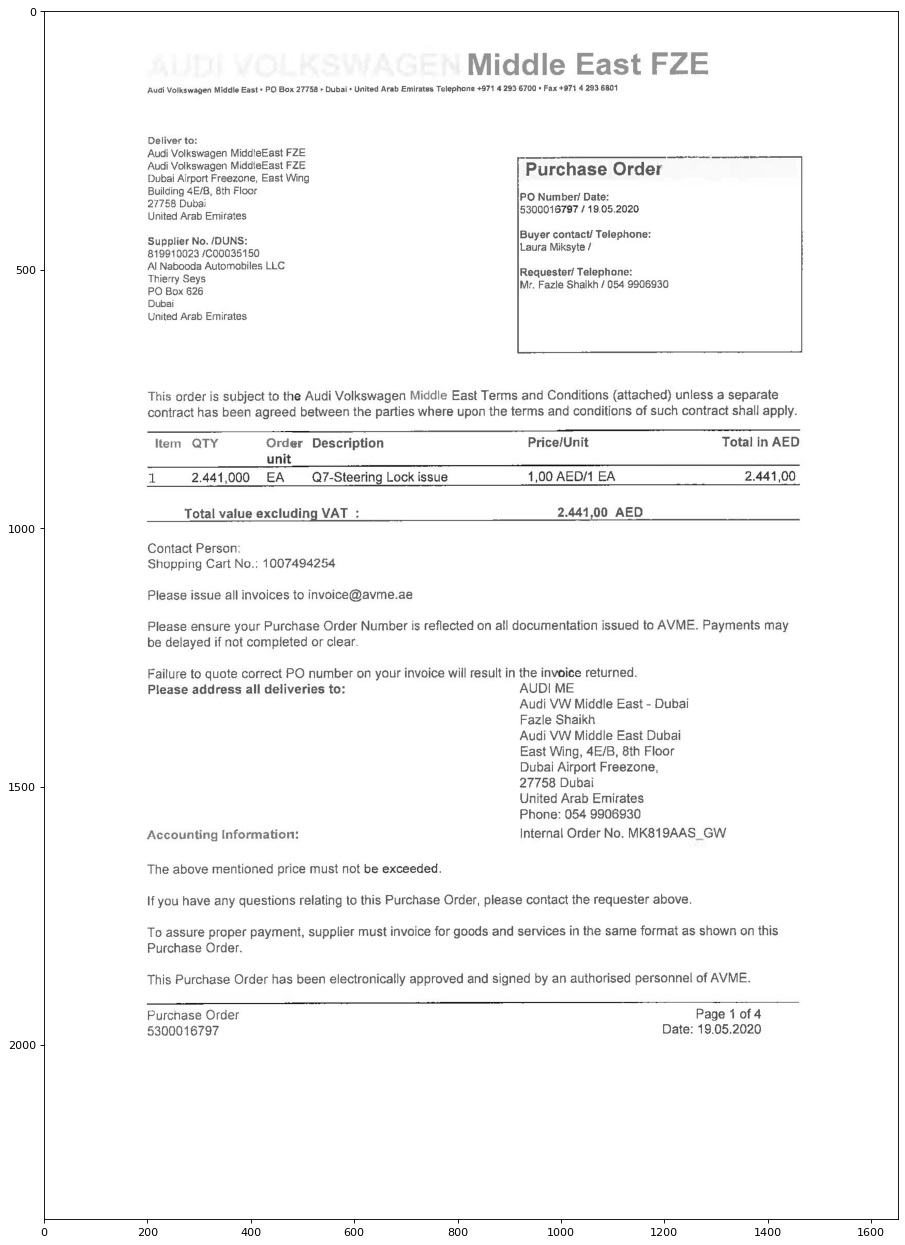

In [19]:
# plotting the image
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(20, 20), dpi=80)
print('Image before detection')
plt.imshow(img)

Image after doing the detection


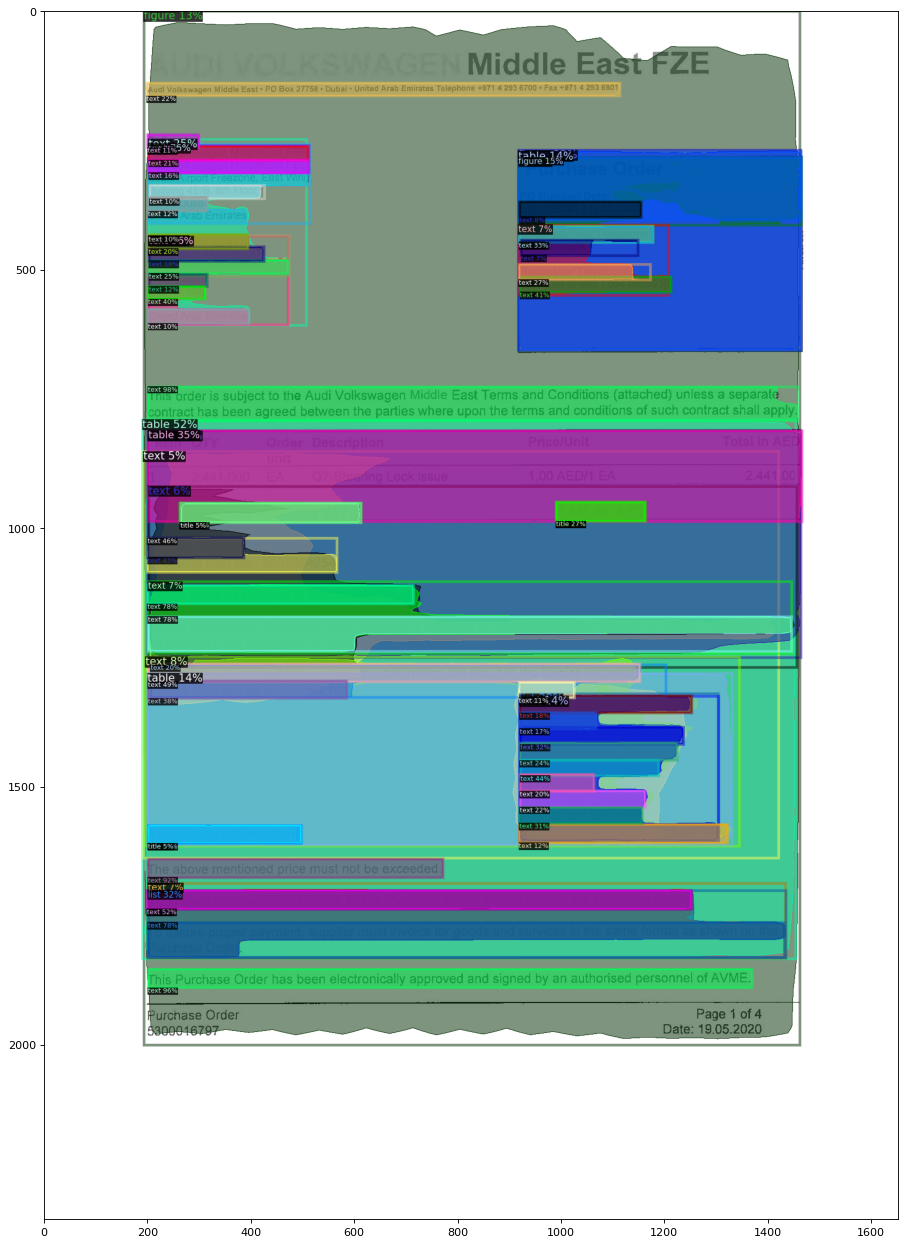

In [21]:
print('Image after doing the detection')
figure(figsize=(20, 20), dpi=80)
plt.imshow(i)